## Estimating  $f(1/3)$ using Taylor polynomials

In [1]:
import numpy as np
import pandas as pd
    
P = lambda n, x: np.array([((-1)**k)*(x-1)**k for k in range(n+1)]).sum()
f = lambda x: 1/x


x = 3
pd.DataFrame({'n': range(100), 'p': [P(n, x) for n in range(100)]})

,n,p
0,0,1
1,1,-1
2,2,3
3,3,-5
4,4,11
...,...,...
95,95,-26409387504754779197847983445
96,96,52818775009509558395695966891
97,97,-105637550019019116791391933781
98,98,211275100038038233582783867563


In [3]:
import matplotlib.pyplot as plt
def Lnk(k, x, kp):
    xk = kp[k]
    rest = np.concatenate((kp[:k], kp[(k+1):]), axis = 0)
    num = np.array([(x - xi) for xi in rest]).prod()
    denom = np.array([(xk - xi) for xi in rest]).prod()
       
    return (num/denom)

kp = np.linspace(-1, 1, 5)
x = np.linspace(-1, 1, 50)
y = np.array([[Lnk(k, xs, kp) for xs in x] for k in range(5)])
print(y.shape)


fig, ax = plt.subplots() ## generating figure and axis instances
# marker size and color
colors = ["lightgreen", "blue", "red", "yellow", "green"]

for i in range(5):
    ax.plot(x, y[i,], color = colors[i], lw = 2, ls = '-', label=i)
    
ax.plot(kp, np.zeros_like(kp), color = "black", marker = 'o')
ax.set_xlabel("x")
ax.set_ylabel("Lnk")
##ax.legend(loc=2)
ax.legend(ncol=5, loc=3, bbox_to_anchor = (0,1)) ## (1,1) are canvas coordinates of the legend

(5, 50)


<IPython.core.display.Javascript object>

## Re-estimating $f(1/3)$ using Lagrange Interpolation

Lagrange approximation at 3: 0.3295454545454546


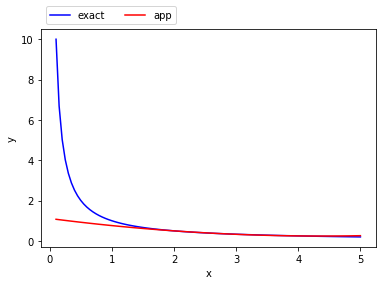

In [3]:
x0 = 2
x1 = 2.75
x2 = 4
kp = [x0,x1,x2]
pl = lambda x: sum([f(kp[i]) * Lnk(i, x, kp) for i in range(3)])

print('Lagrange approximation at 3: {}'.format(pl(3)))

x_grid = np.linspace(0.1, 5, 100)
y_grid = np.array([f(x) for x in x_grid])
y_app = np.array([pl(x) for x in x_grid])

fig, ax = plt.subplots()
ax.plot(x_grid, y_grid, color = 'b', label='exact')
ax.plot(x_grid, y_app, color = 'r', label='app')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(ncol=2, loc=3, bbox_to_anchor = (0,1))
